In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

Câu 1:
Tạo ra 1 bộ dataset từ 10 điểm dữ liệu sinh ra từ hàm y = x^2 + noise. Dùng sklearn fit hàm đa thức bậc 9 với dữ liệu trên. Sau đó thêm 100 dữ liệu nữa xem hàm đa thức bậc 9 như nào?
* Hãy báo cáo MSE và vẽ đồ thị trong hai trường hợp (10 điểm dữ liệu ban đầu và 100 điểm dữ liệu sau)
* Hiện tượng gì đang xảy ra?


MSE with 10 data points: 1.1897694157924586e-28
MSE with 100 data points: 0.0853311542198226


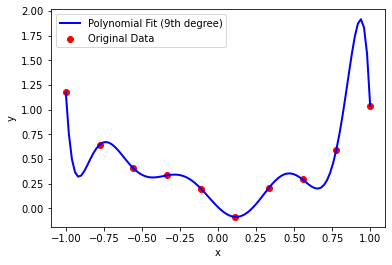

In [12]:
np.random.seed(0)
noise = np.random.normal(0, 0.1, 10)

# Tạo dữ liệu ban đầu
x = np.linspace(-1, 1, 10)
y = x**2 + noise

# Đưa dữ liệu vào mảng numpy 2D
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Fit hàm đa thức bậc 9
poly = PolynomialFeatures(degree=9)
x_poly = poly.fit_transform(x)

regressor = LinearRegression()
regressor.fit(x_poly, y)

# Thêm 100 điểm dữ liệu mới
new_x = np.linspace(-1, 1, 100)
new_y = new_x**2

# Đưa dữ liệu mới vào mảng numpy 2D
new_x = new_x.reshape(-1, 1)

# Dự đoán giá trị mới
new_x_poly = poly.fit_transform(new_x)
new_y_poly = regressor.predict(new_x_poly)

# Tính MSE và vẽ đồ thị
mse_10_points = mean_squared_error(y, regressor.predict(x_poly))
mse_100_points = mean_squared_error(new_y, new_y_poly)

print("MSE with 10 data points:", mse_10_points)
print("MSE with 100 data points:", mse_100_points)

plt.scatter(x, y, color='red', label='Original Data')
plt.plot(new_x, new_y_poly, color='blue', linewidth=2, label='Polynomial Fit (9th degree)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Câu 2: Code from scratch
Implement hàm tính convolution
* Input: X, W, stride, padding
* Output: Y
Kiểm tra lại với hàm tính convolution được implement trong thư viện Pytorch

In [13]:
def convolution(X, W, stride=1, padding=0):
    # Get the dimensions of the input
    batch_size, in_channels, input_height, input_width = X.shape
    
    # Get the dimensions of the kernel
    _, _, kernel_height, kernel_width = W.shape
    
    # Add padding to the input
    padded_height = input_height + 2 * padding
    padded_width = input_width + 2 * padding
    padded_X = np.pad(X, ((0, 0), (0, 0), (padding, padding), (padding, padding)), mode='constant')
    
    # Calculate the output dimensions
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1
    
    # Initialize the output
    Y = np.zeros((batch_size, W.shape[0], output_height, output_width))
    
    # Perform convolution
    for b in range(batch_size):
        for c in range(W.shape[0]):
            for h in range(0, padded_height - kernel_height + 1, stride):
                for w in range(0, padded_width - kernel_width + 1, stride):
                    Y[b, c, h // stride, w // stride] = np.sum(padded_X[b, :, h:h+kernel_height, w:w+kernel_width] * W[c])
    
    return Y

In [14]:
input_tensor = torch.randn(1, 3, 5, 5)
weight_tensor = torch.randn(4, 3, 3, 3)

# Convert input tensor and weight tensor to numpy arrays
np_input = input_tensor.numpy()
np_weights = weight_tensor.numpy()

# Perform convolution using the custom function
np_output = convolution(np_input, np_weights)

# Convert input and weight tensors to PyTorch format
input_tensor = torch.from_numpy(np_input)
weight_tensor = torch.from_numpy(np_weights)

# Define the convolution layer in PyTorch
conv_layer = nn.Conv2d(3, 4, kernel_size=3)
conv_layer.weight.data = weight_tensor

# Perform convolution using the PyTorch function
torch_output = conv_layer(input_tensor).detach().numpy()

# Compare the outputs
print('Custom Convolution Output:')
print(np_output)
print('PyTorch Convolution Output:')
print(torch_output)

Custom Convolution Output:
[[[[-0.80576527  0.44920373 -5.20315838]
   [ 2.11867046  9.28183937 -0.48807108]
   [ 0.94170785 -0.95062971 -1.12486923]]

  [[-3.26701021  3.15847158 -0.58712626]
   [-2.58679175  3.78024173 -2.48159194]
   [ 5.89360666  2.07791805  7.04358101]]

  [[-5.34632111  3.04598093 -5.62857914]
   [ 6.85946417 -6.92725182 -1.3360908 ]
   [-1.21650529 -7.10776901  2.81507969]]

  [[10.9365139  -1.35792458  9.63267136]
   [-4.2753129   7.87466145 -8.86046791]
   [ 8.12799263 -5.08057928 -0.50827998]]]]
PyTorch Convolution Output:
[[[[-0.66914     0.58582807 -5.066534  ]
   [ 2.2552943   9.418463   -0.35144603]
   [ 1.0783322  -0.814005   -0.9882449 ]]

  [[-3.3617887   3.063693   -0.6819036 ]
   [-2.68157     3.6854634  -2.57637   ]
   [ 5.798828    1.98314     6.9488034 ]]

  [[-5.3761077   3.016195   -5.6583643 ]
   [ 6.829679   -6.957037   -1.3658755 ]
   [-1.2462909  -7.137554    2.7852943 ]]

  [[10.986177   -1.3082608   9.682335  ]
   [-4.225648    7.924326   

Câu 3:
Cho dataset CIFAR-10
* Implement 1 model tương tự VGG16 (có thể nông hơn) với dữ liệu trên sử dụng Pytorch
* Chỉnh learning rate, vẽ đồ thị loss tương ứng.
* Chia tập train/test tỉ lệ 80/20, tính các chỉ số accuracy, recall, f1-score trên tập test.


In [15]:
class VGG(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            
            nn.Linear(4096, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        
        return x

In [16]:
class VGG16_Shallow(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16_Shallow, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))

        self.classifier = nn.Sequential(
            nn.Linear(128 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),

            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)

        return x

In [17]:
batch_size = 64 #train on batches of 64 examples at a time.
learning_rate = [0.001, 0.000000001, 1]
num_epochs = 10

In [18]:
#num_epochs = 10
#batch_size = 64
#learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [19]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
val_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform,download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

num_train_samples = int(len(train_dataset) * 0.8)
num_val_samples = len(train_dataset) - num_train_samples

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
model = VGG16_Shallow().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Learning Rate: 0.001, Epoch [1/5], Train Loss: 1.4410, Val Loss: 1.1621
Learning Rate: 0.001, Epoch [2/5], Train Loss: 1.0663, Val Loss: 0.9692
Learning Rate: 0.001, Epoch [3/5], Train Loss: 0.9196, Val Loss: 0.8794
Learning Rate: 0.001, Epoch [4/5], Train Loss: 0.8389, Val Loss: 0.8245
Learning Rate: 0.001, Epoch [5/5], Train Loss: 0.7779, Val Loss: 0.7558
Learning Rate: 0.001, Accuracy: 0.7436
Learning Rate: 0.001, Precision: 0.7553072625698324
Learning Rate: 0.001, Recall: 0.9795810828612831
Learning Rate: 0.001, F1_Score: 0.8529479238357421


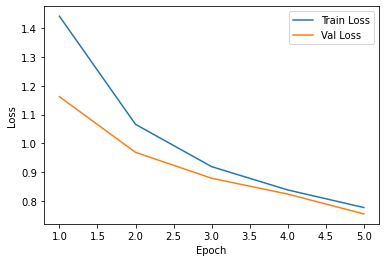

Learning Rate: 1e-09, Epoch [1/5], Train Loss: 2.3018, Val Loss: 2.3010
Learning Rate: 1e-09, Epoch [2/5], Train Loss: 2.3019, Val Loss: 2.3007
Learning Rate: 1e-09, Epoch [3/5], Train Loss: 2.3015, Val Loss: 2.3006
Learning Rate: 1e-09, Epoch [4/5], Train Loss: 2.3013, Val Loss: 2.3005
Learning Rate: 1e-09, Epoch [5/5], Train Loss: 2.3012, Val Loss: 2.3003
Learning Rate: 1e-09, Accuracy: 0.1011
Learning Rate: 1e-09, Precision: 0.11174975129877307
Learning Rate: 1e-09, Recall: 0.5147657841140529
Learning Rate: 1e-09, F1_Score: 0.1836345472709109


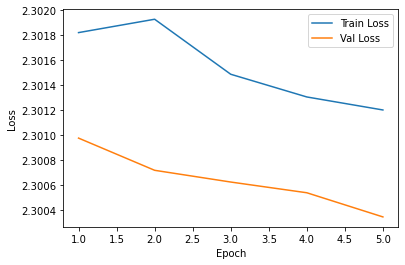

Learning Rate: 1, Epoch [1/5], Train Loss: 3527350.4013, Val Loss: 59.9913
Learning Rate: 1, Epoch [2/5], Train Loss: 39.0519, Val Loss: 67.3632
Learning Rate: 1, Epoch [3/5], Train Loss: 6.1921, Val Loss: 325.8216
Learning Rate: 1, Epoch [4/5], Train Loss: 7.4821, Val Loss: 52.7974
Learning Rate: 1, Epoch [5/5], Train Loss: 2.3638, Val Loss: 39.4546
Learning Rate: 1, Accuracy: 0.1
Learning Rate: 1, Precision: 0.1111111111111111
Learning Rate: 1, Recall: 0.5
Learning Rate: 1, F1_Score: 0.1818181818181818


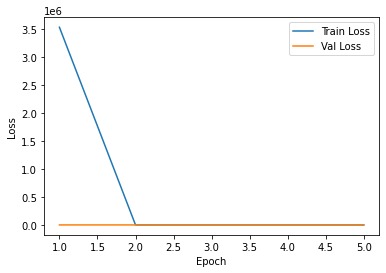

In [20]:
num_epochs = 5
losses = []
for lr in learning_rate:
    model = VGG16_Shallow().to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)

        train_loss = train_loss / len(train_loader.dataset)
        train_losses.append(train_loss)
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
        
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

        print(f'Learning Rate: {lr}, Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    model.eval()
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        true_positives = 0
        false_negatives = 0
        false_positives = 0

        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            batch_size = images.size(0)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

            for i in range(labels.size(0)):
                if predicted[i] == labels[i]:
                    true_positives += 1
                else:
                    if labels[i] == 1:
                        false_negatives += 1
                    else:
                        false_positives += 1
            accuracy = total_correct / total_samples
            precision = true_positives / (true_positives + false_positives)
            recall = true_positives / (true_positives + false_negatives)
            f1_score = 2 * (precision * recall) / (precision + recall)
        
        print(f'Learning Rate: {lr}, Accuracy: {accuracy}')
        print(f'Learning Rate: {lr}, Precision: {precision}')
        print(f'Learning Rate: {lr}, Recall: {recall}')
        print(f'Learning Rate: {lr}, F1_Score: {f1_score}')
        
        plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
        plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

Câu 4
Tại sao khi build model, càng những layer phía sau, width và height giảm nhưng depth lại tăng


Performing max pooling will reduce the feature map size according to the specified ratio.

In a convolutional neural network (CNN), depth refers to the number of layers in the network. Each layer in a CNN is designed to extract features from the input image, and deeper networks have more layers to extract more complex features. The deeper the network, the more abstraction it can perform, allowing it to learn more high-level features from the input image. This can lead to better performance on image recognition tasks, because the network is able to learn more about the image and make more accurate predictions. Additionally, deeper networks can also be more robust to noise and variations in the input image.

In convolutional network, we have kernel or filters at each conv layers. These kernel has size and it is usually 3x3 or 5x5. This filter operate on the input data, and give activation accordingly. The values to the filter (the weights) are learned to activate on certain feature in the input data.

Suppose we are using kernel of 3x3 on every conv layer in a network. Now on the first conv layer the receptive field will be 3x3=9. This mean the filters on this layer will be able to learn feature of size within 9 pixels square. On the second conv layer, the receptive field will be 3x3 but each point is based on the 3x3 of the first layer. So the total receptive field will be (3x3)x9=81 pixels. Similarly at the third layer, the receptive field will be larger than the second one. Each filter learnt its feature template based on the receptive field. Bigger the receptive field, more bigger and complex feature it will gonna learn.

The idea is that as we go down from one layer to another layer, our receptive field will gonna increase and the filters at that layer will going to learn bigger and more complex features.

Hence a deeper convolutional network will allow learning of more complex and bigger features as compare to the shorter networks.

Câu 5 (Optional)

1 bài viết hay bao gồm tool sử dụng để vísualize CNN model


https://github.com/ashishpatel26/Tools-to-Design-or-Visualize-Architecture-of-Neural-Network

https://poloclub.github.io/cnn-explainer/